<h1>World Energy Consumption</h1>

<h2>Notes</h2>

<p style = 'background-color:pink'>I AM NOT AN EXPERT, I DID THIS JUST FOR PRACTICE</p>

- Continent - North America
- Energy_type - Type of energy source
- Year - Year the data was recorded
- Energy_consumption - Amount of Consumption for the specific energy source, measured (quad Btu)
- Energy_production - Amount of Production for the specific energy source, measured (quad Btu)
- GDP - Countries GDP at purchasing power parities, measured (Billion 2015 PPP)
- Population - Population of specific Country measured Mperson
- Energyintensityper_capita - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
- Energyintensityby_GDP- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015$ GDP PPP)
- CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)

In [1]:
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import plotly.graph_objects as go

In [2]:
from pandas.plotting import scatter_matrix
from barchart3d import barchart3d
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv('energy.csv')

In [8]:
all_energy = dataset[dataset.Energy_type == 'all_energy_types']
all_energy = all_energy.fillna(0, axis = 0)
all_energy = all_energy.groupby(['Year', 'Energy_type']).agg({'Population':'sum', 'Energy_consumption':'sum'}).reset_index()

<h1>Energy Consumption</h1>

<p style = 'background-color:yellow'>The energy Consumption shows how much of the Energy has been consumed by the world as a whole and for the last 5 years of the Dataset</p>

<h2>1980 - 2019</h2>

<h3>Linear Regression</h3>

In [13]:
x = np.array(all_energy.Population).reshape((-1,1))
y = np.array(all_energy.Energy_consumption)

lr_model = LinearRegression().fit(x,y)
y_predict = lr_model.predict(x)

r_squared = lr_model.score(x,y)
print(f'Coeficient of Determination: {r_squared}',
     '\nY-Intercept:', lr_model.intercept_,
     '\nSlope:',lr_model.coef_,
      '\nCoeficient of Determination lets us know how much of the Variance is explained',
     '\nThe slope of the line tells us if we are moving in a positive or negative direction.'
     )

Coeficient of Determination: 0.9373122984153477 
Y-Intercept: -223.70721940558042 
Slope: [8.9498072e-05] 
Coeficient of Determination lets us know how much of the Variance is explained 
The slope of the line tells us if we are moving in a positive or negative direction.


<p style = 'background-color:yellow'>Ordinary Least Squares</p>

In [14]:
x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.86e-24
Time:                        14:39:17   Log-Likelihood:                -212.82
No. Observations:                  40   AIC:                             429.6
Df Residuals:                      38   BIC:                             433.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -223.7072     45.794     -4.885      0.0

<p style = 'background-color:yellow'>I used population when doing this regression. This is telling us that as population steadily increases so does the energy consumption</p>

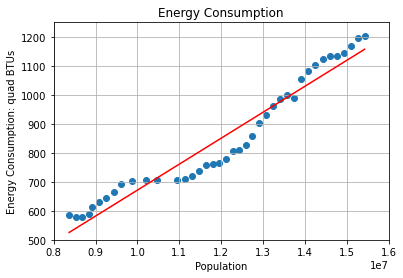

In [20]:
plt.scatter(all_energy.Population, all_energy.Energy_consumption)
plt.grid(True)
plt.title('Energy Consumption')
plt.xlabel('Population')
plt.ylabel('Energy Consumption: quad BTUs')
plt.xlim(8000000, 16000000)
plt.ylim(500, 1250)

plt.plot(x, y_predict, color = 'red')

plt.show()

<h3>Rolling Averages</h3>

<p style = 'background-color:yellow'>I looked at the rolling averages with a window of 2 and a unit of measurement of Years. This dataset contains
40 years worth data</p>

Moving average change by year:  [585.8, 582.3, 581.33, 582.86, 589.18, 596.13, 603.02, 610.83, 619.75, 628.05, 635.23, 641.28, 646.23, 650.89, 655.43, 660.64, 666.39, 671.63, 676.54, 681.68, 687.54, 693.13, 698.99, 705.57, 713.41, 721.76, 730.58, 739.71, 748.67, 756.72, 766.29, 776.13, 786.04, 795.92, 805.53, 814.68, 823.59, 832.66, 841.96, 850.97]
Rolling average change: 696.38


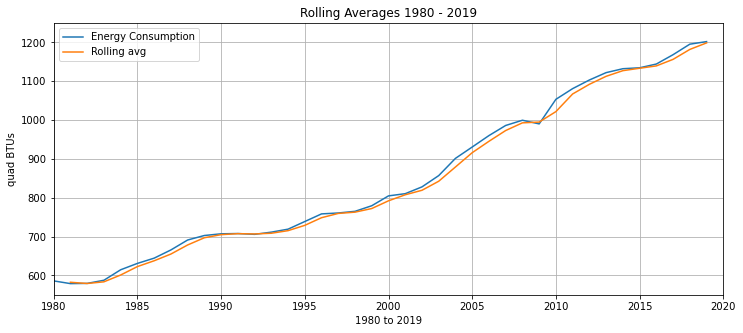

In [23]:
plt.figure( figsize = ( 12, 5))

all_energy[ 'Change' ] = all_energy.Energy_consumption.rolling(2).mean()

sns.lineplot( x = 'Year',
             y = 'Energy_consumption',
             data = all_energy,
             label = 'Energy Consumption')
  
sns.lineplot( x = 'Year',
             y = 'Change',
             data = all_energy,
             label = 'Rolling avg')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(all_energy.Energy_consumption));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Moving average change by year: ',moving_averages)
print('Rolling average change:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Rolling Averages 1980 - 2019')
plt.xlabel('1980 to 2019')
plt.ylabel('quad BTUs')
plt.xlim(1980, 2020)
plt.ylim(550, 1250)
plt.grid(True)

plt.show()

In [45]:
world_energy_consum = dataset.groupby(['Energy_type', 'Year']).agg({'Energy_consumption': 'sum'}).reset_index()

<p style= 'background-color:yellow'>Creating a simple scatter plot we can see how coal and oil are slowly on the fall while nuclear and renewables are slowly on the rise. Natrual gas consumption is also on the rise</p>

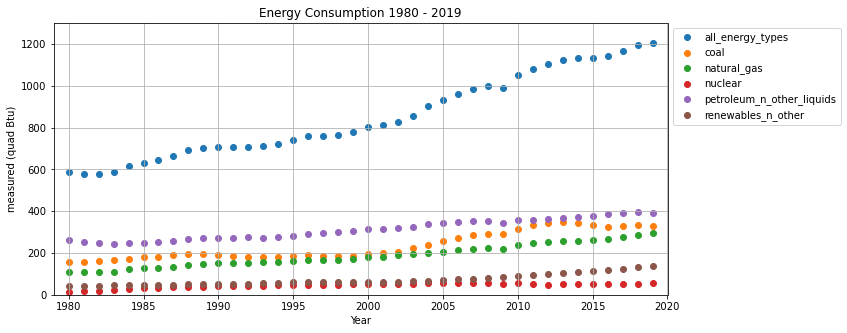

In [46]:
f, axes = plt.subplots(1,1, figsize = (11, 5))

for a,(b,c) in enumerate (world_energy_consum.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_consumption, label = b)

plt.title('Energy Consumption 1980 - 2019')
plt.xlabel('Year')
plt.ylabel('measured (quad Btu)')
plt.legend(bbox_to_anchor=[1, 1])
plt.grid(True)
plt.xlim(1979, 2020)
plt.ylim(0, 1300)
plt.show()

<p style = 'background-color:yellow'>This pie chart shows us which energy source was consumed the most from 1980 to 2019. Oil is the number 1 energy
source consumed</p>

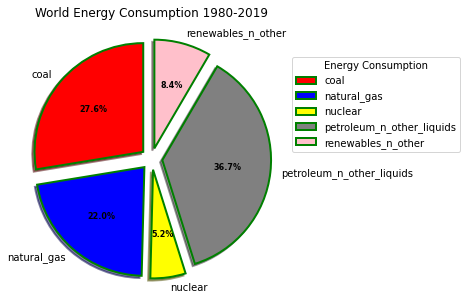

In [61]:
energy_consum = dataset.groupby(['Energy_type']).agg({'Energy_consumption': 'sum'}).reset_index()
energy_consum.drop(energy_consum[(energy_consum['Energy_type'] == 'all_energy_types')].index, inplace = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(energy_consum.Energy_consumption,
                                  autopct = lambda pct: func(pct, energy_consum.Energy_consumption),
                                  labels = energy_consum.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, energy_consum.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, .2, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title('World Energy Consumption 1980-2019')
 
plt.show()

<h2>2015-2019</h2>

<h3>Linear Regression</h3>

In [48]:
last5yrs = all_energy[all_energy.Year > 2014]

x_5yrs = np.array(last5yrs.Population).reshape((-1,1))
y_5yrs = np.array(last5yrs.Energy_consumption)

lr_model5 = LinearRegression().fit(x_5yrs,y_5yrs)
y_pred5 = lr_model5.predict(x_5yrs)

r_squared5_ec = lr_model5.score(x_5yrs,y_5yrs)
print(f'Coeficient of Determination: {r_squared5_ec}',
      '\nY-Intercept:',lr_model5.intercept_,
     '\nSlope:',lr_model5.coef_)

Coeficient of Determination: 0.9658509836687201 
Y-Intercept: -504.7448101277305 
Slope: [0.00011088]


<p style = 'background-color:yellow'>Ordinary Least Squares</p>

In [49]:
x2_5yrs = sm.add_constant(x_5yrs)
est_5yrs = sm.OLS(y_5yrs, x2_5yrs)
est2_5yrs = est_5yrs.fit()
print(est2_5yrs.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     84.85
Date:                Sun, 29 Jan 2023   Prob (F-statistic):            0.00271
Time:                        15:23:54   Log-Likelihood:                -15.089
No. Observations:                   5   AIC:                             34.18
Df Residuals:                       3   BIC:                             33.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -504.7448    181.724     -2.778      0.0

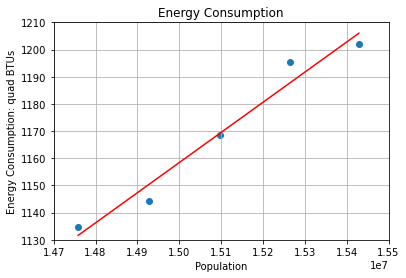

In [50]:
plt.scatter(last5yrs.Population, last5yrs.Energy_consumption)
plt.grid(True)
plt.title('Energy Consumption')
plt.xlabel('Population')
plt.ylabel('Energy Consumption: quad BTUs')
plt.xlim(14700000, 15500000)
plt.ylim(1130,1210)

plt.plot(x_5yrs, y_pred5, color = 'red')

plt.show()

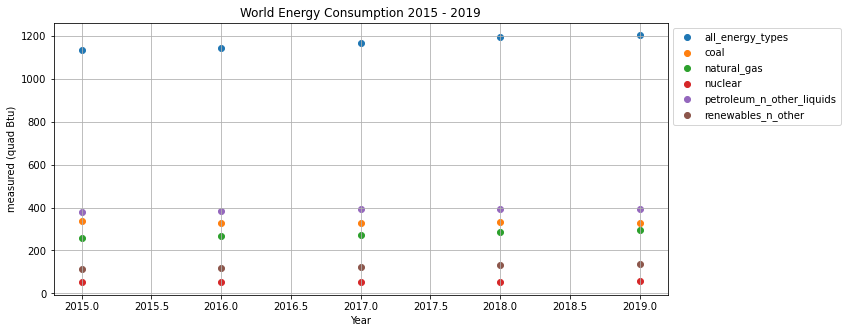

In [55]:
f, axes = plt.subplots(1,1, figsize = (11, 5))

last5yrs = world_energy_consum[world_energy_consum.Year > 2014]

for a,(b,c) in enumerate (last5yrs.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_consumption, label = b)

plt.title('World Energy Consumption 2015 - 2019')
plt.xlabel('Year')
plt.ylabel('measured (quad Btu)')
plt.legend(bbox_to_anchor=[1, 1])
plt.grid(True)
plt.show()

<p style = 'background-color:yellow'>This pie chart shows us which energy source was consumed the most from 2015 to 2019. Oil is the number 1 energy source consumed</p>

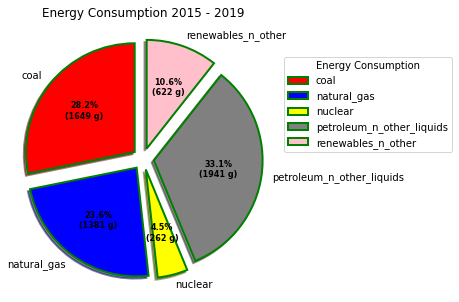

In [60]:
last5yrs = dataset[dataset.Year > 2014]

last5yrs = last5yrs.replace(np.nan,0)
last5yrs = last5yrs.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()

last5yrs.drop(last5yrs[(last5yrs['Energy_type'] == 'all_energy_types')].index, inplace = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(last5yrs.Energy_consumption,
                                  autopct = lambda pct: func(pct, last5yrs.Energy_consumption),
                                  labels = last5yrs.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, last5yrs.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, 0.2, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Energy Consumption 2015 - 2019")
 
# show plot
plt.show()

<h2>Top Ten Countries Energy Consumption</h2>

In [68]:
top_ten_all_energy = dataset[dataset.Energy_type == 'all_energy_types']
top_ten_all_energy = top_ten_all_energy.fillna(0, axis = 0)
energy_consum_top10 = (top_ten_all_energy.groupby(['Country', 'Energy_type']).agg({'Energy_consumption': 'sum'}).reset_index()).sort_values(by = 'Energy_consumption', ascending = False).head(11)
energy_consum_top10 = energy_consum_top10.drop(labels = 227, axis = 0)

In [69]:
energy_consum_top10

,Country,Energy_type,Energy_consumption
219,United States,all_energy_types,3639.002120
40,China,all_energy_types,2631.259914
169,Russia,all_energy_types,829.051395
106,Japan,all_energy_types,798.819923
70,Former U.S.S.R.,all_energy_types,697.882262
98,India,all_energy_types,570.443723
35,Canada,all_energy_types,493.947055
78,Germany,all_energy_types,413.296653
72,France,all_energy_types,403.426968
218,United Kingdom,all_energy_types,366.932781


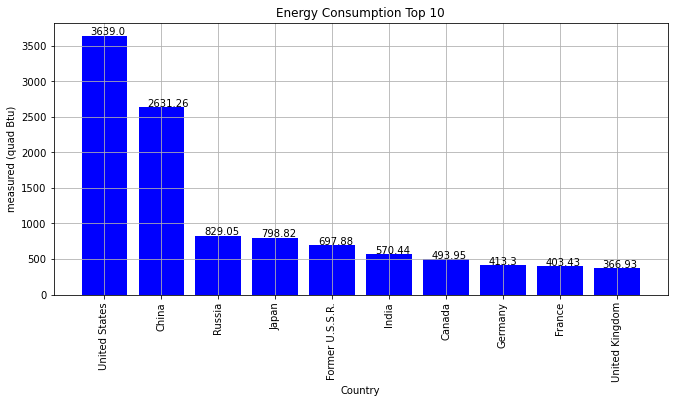

In [70]:
f, axes = plt.subplots(1,1, figsize = (11, 5))

plt.bar(energy_consum_top10.Country,energy_consum_top10.Energy_consumption,align='center', linewidth=2, color='blue')

for i, v in enumerate(energy_consum_top10.Energy_consumption.round(decimals = 2)):
    plt.text(i-.25, v + 10, str(v))

plt.title('Energy Consumption Top 10')
plt.ylabel('measured (quad Btu)')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.grid(True)

plt.show()

<h1>CO2 Emissions</h1><p>This sections will tell us how much CO2 is being released into earth atmosphere by energy type</p>

<h2>1980 - 2019</h2>

<h3>Linear Regression</h3>

In [72]:
world_all_energy = dataset[dataset.Energy_type == 'all_energy_types']
world_all_energy = world_all_energy.fillna(0, axis = 0)
world_all_energy = world_all_energy.groupby(['Year','Energy_type']).agg({'Population':'sum', 'CO2_emission':'sum'}).reset_index()

world_all_energy.fillna(0,axis = 0, inplace = True)

x_ec = np.array(world_all_energy.Population).reshape((-1,1))
y_ec = np.array(world_all_energy.CO2_emission)

lr_model_ec = LinearRegression().fit(x_ec,y_ec)
y_pred_ec = lr_model_ec.predict(x_ec)

r_squared_ec = lr_model_ec.score(x_ec,y_ec)
print(f'Coeficient of Determination: {r_squared_ec}',
      '\nY-Intercept:',lr_model_ec.intercept_,
     '\nSlope:',lr_model_ec.coef_,
     '\nCoeficient of Determination lets us know how much of the Variance is explained',
     '\nThe slope of the line tells us if we are moving in a positive or negative direction.')

Coeficient of Determination: 0.8613575923029473 
Y-Intercept: -16880.36892987293 
Slope: [0.0056397] 
Coeficient of Determination lets us know how much of the Variance is explained 
The slope of the line tells us if we are moving in a positive or negative direction.


<p style = 'background-color:yellow'>Ordinary Least Squares</p>

In [74]:
X2_ec = sm.add_constant(x_ec)
est_ec = sm.OLS(y_ec, X2_ec)
est2_ec = est_ec.fit()
print(est2_ec.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           6.85e-18
Time:                        15:36:53   Log-Likelihood:                -396.12
No. Observations:                  40   AIC:                             796.2
Df Residuals:                      38   BIC:                             799.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.688e+04   4476.696     -3.771      0.0

<p style = 'background-color: Yellow'>I used population in regression to show that as population increased so does the amount of CO2 released into earth atmosphere does. However, there have been brief moments where the CO2 being released went down.</p>

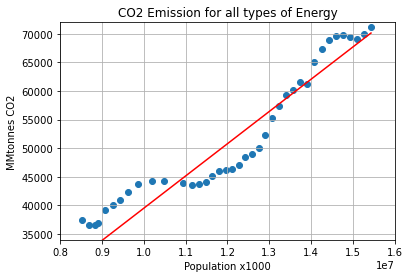

In [80]:
plt.scatter(world_all_energy.Population, world_all_energy.CO2_emission)
plt.grid(True)
plt.title('CO2 Emission for all types of Energy')
plt.xlabel('Population x1000')
plt.ylabel('MMtonnes CO2')
plt.xlim(8000000, 16000000)
plt.ylim(34000, 72000)

plt.plot(x_ec, y_pred_ec, color = 'red')

plt.show()

<h3>Rolling Averages</h3>

<p style = 'background-color:Yellow'>The rolling average window size is 2 and unit of measurements is in years</p>

Moving average change by year:  [9893.25, 23648.6, 27984.01, 30130.01, 31495.41, 32780.36, 33819.54, 34719.94, 35565.24, 36377.23, 37099.05, 37698.26, 38179.15, 38561.51, 38909.67, 39235.92, 39581.19, 39942.47, 40273.17, 40574.73, 40880.21, 41227.3, 41562.03, 41914.95, 42331.94, 42827.04, 43366.02, 43933.84, 44493.62, 45063.53, 45585.47, 46193.38, 46831.97, 47479.46, 48113.76, 48715.84, 49277.66, 49800.47, 50318.56, 50839.84]
Rolling average change: 39930.64


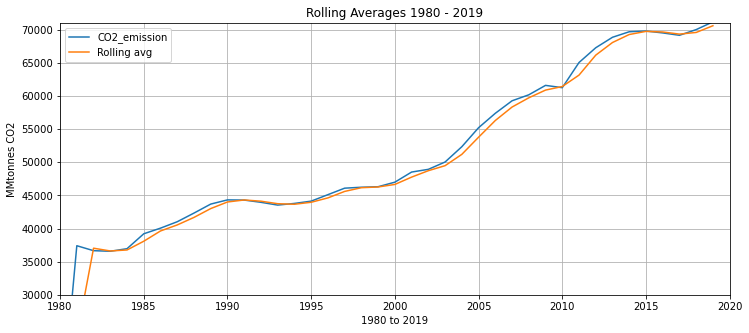

In [87]:
plt.figure( figsize = ( 12, 5))

world_all_energy['Change_CO2'] = world_all_energy.CO2_emission.rolling(2).mean()

sns.lineplot( x = 'Year',
             y = 'CO2_emission',
             data = world_all_energy,
             label = 'CO2_emission')
  
sns.lineplot( x = 'Year',
             y = 'Change_CO2',
             data = world_all_energy,
             label = 'Rolling avg')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(world_all_energy.CO2_emission));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Moving average change by year: ',moving_averages)
print('Rolling average change:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Rolling Averages 1980 - 2019')
plt.xlabel('1980 to 2019')
plt.ylabel('MMtonnes CO2')
plt.xlim(1980, 2020)
plt.ylim(30000, 71000)
plt.grid(True)

plt.show()

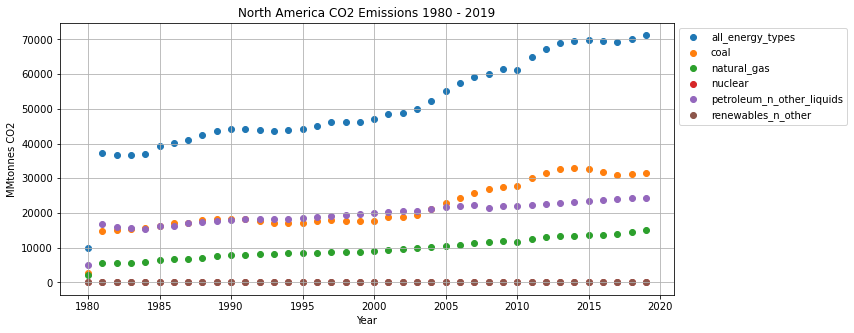

In [88]:
f, axes = plt.subplots(1,1, figsize = (11, 5))
world_energy = dataset.groupby(['Energy_type', 'Year']).agg({'CO2_emission': 'sum'}).reset_index()

for a,(b,c) in enumerate (world_energy.groupby('Energy_type')):
    axes.scatter(c.Year, c.CO2_emission, label = b)

plt.title('North America CO2 Emissions 1980 - 2019')
plt.xlabel('Year')
plt.ylabel('MMtonnes CO2')
plt.legend(bbox_to_anchor=[1, 1])
plt.grid(True)
plt.show()

<p style = 'background-color:Yellow'>This pie chart shows us which energy type releases the most CO2 into the atmosphere. Coal is the number 1 energy type to release the most CO2. Since nuclear and renewables_n_others do not release any CO2 you will see a 0 on them in the pie chart. </p>

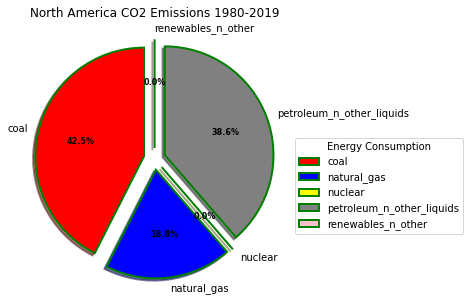

In [93]:
co2_em = dataset.groupby(['Energy_type']).agg({'CO2_emission': 'sum'}).reset_index()
co2_em.drop(co2_em[(co2_em['Energy_type'] == 'all_energy_types')].index, inplace = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(co2_em.CO2_emission,
                                  autopct = lambda pct: func(pct, co2_em.CO2_emission),
                                  labels = co2_em.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, co2_em.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, -.1, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("North America CO2 Emissions 1980-2019")
 
plt.show()

<h2>2015-2019</h2>

<p style = 'background-color:yellow'>I took at the last 5 years of the dataset in terms of CO2 being released. PLEAE NOTE: The Coeficient of Determination is at 44%, only 44 percent of the variance is accounted for<p>

In [94]:
last5yrs = dataset[(dataset.Year > 2014) & (dataset.Energy_type == 'all_energy_types')]
last5yrs = last5yrs.groupby(['Year', 'Energy_type']).agg({'Population':'sum','CO2_emission':'sum'}).reset_index()
last5yrs = last5yrs.replace(np.nan, 0)

x5_ec = np.array(last5yrs.Population).reshape((-1,1))
y5_ec = np.array(last5yrs.CO2_emission)

lr_model5 = LinearRegression().fit(x5_ec,y5_ec)
y_pred5 = lr_model5.predict(x5_ec)

r_squared5_ec = lr_model5.score(x5_ec,y5_ec)
print(f'Coeficient of Determination: {r_squared5_ec}',
      '\nY-Intercept:',lr_model5.intercept_,
     '\nSlope:',lr_model5.coef_)

Coeficient of Determination: 0.44640187079057747 
Y-Intercept: 40714.78674043956 
Slope: [0.00193487]


<p style = 'background-color:Yellow'>Ordinary Least Squares</p>

In [96]:
X2_ec = sm.add_constant(x5_ec)
est_ec = sm.OLS(y5_ec, X2_ec)
est2_ec = est_ec.fit()
print(est2_ec.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     2.419
Date:                Sun, 29 Jan 2023   Prob (F-statistic):              0.218
Time:                        15:50:47   Log-Likelihood:                -38.280
No. Observations:                   5   AIC:                             80.56
Df Residuals:                       3   BIC:                             79.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.071e+04   1.88e+04      2.168      0.1

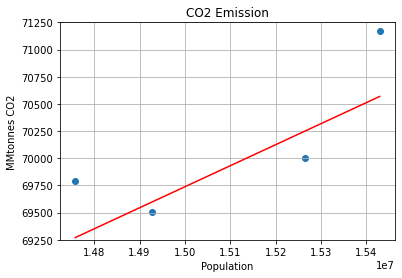

In [98]:
plt.scatter(last5yrs.Population, last5yrs.CO2_emission)
plt.grid(True)
plt.title('CO2 Emission')
plt.xlabel('Population')
plt.ylabel('MMtonnes CO2')
# plt.xlim(565000, 590000)
plt.ylim(69250, 71250)

plt.plot(x5_ec, y_pred5, color = 'red')

plt.show()

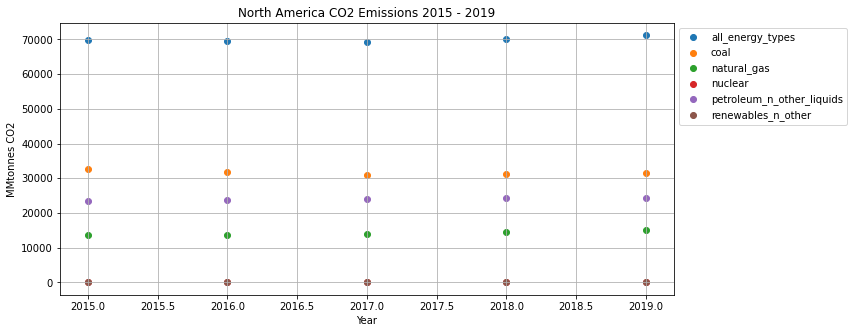

In [99]:
f, axes = plt.subplots(1,1, figsize = (11, 5))

last5yrs = dataset[(dataset.Year > 2014)]
last5yrs = last5yrs.groupby(['Year', 'Energy_type']).agg({'CO2_emission':'sum'}).reset_index()
last5yrs = last5yrs.replace(np.nan, 0) 

for a,(b,c) in enumerate (last5yrs.groupby('Energy_type')):
    axes.scatter(c.Year, c.CO2_emission, label = b)

plt.title('North America CO2 Emissions 2015 - 2019')
plt.xlabel('Year')
plt.ylabel('MMtonnes CO2')
plt.legend(bbox_to_anchor=[1, 1])
plt.grid(True)
plt.show()

<p style = 'background-color:Yellow'>This pie chart shows us which energy type releases the most CO2 into the atmosphere from 2015 to 2019. Coal is the number 1 energy type to release the most CO2. Since nuclear and renewables_n_others do not release any CO2 you will see a 0 on them in the pie chart. </p>

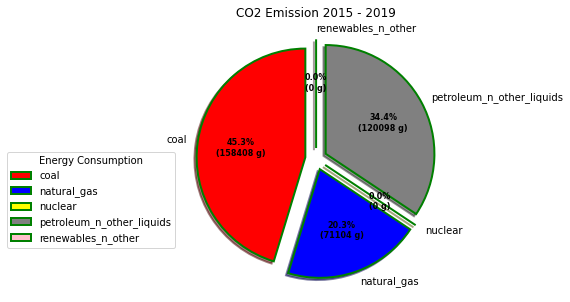

In [103]:
last5yrs = dataset[dataset.Year > 2014]

last5yrs = last5yrs.replace(np.nan,0)
last5yrs = last5yrs.groupby('Energy_type').agg({'CO2_emission': 'sum'}).reset_index()

last5yrs.drop(last5yrs[(last5yrs['Energy_type'] == 'all_energy_types')].index, inplace = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(last5yrs.CO2_emission,
                                  autopct = lambda pct: func(pct, last5yrs.CO2_emission),
                                  labels = last5yrs.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, last5yrs.Energy_type,
          title ="Energy Consumption",
          loc ="center right",
          bbox_to_anchor =(1, -.15, -1, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("CO2 Emission 2015 - 2019")
 
# show plot
plt.show()

<h3>Top Ten</h3>

In [104]:
world_all_co2 = dataset[dataset.Energy_type == 'all_energy_types']
world_all_co2 = world_all_co2.fillna(0)

In [107]:
co2_top10 = (world_all_co2.groupby(['Country', 'Energy_type']).agg({'CO2_emission': 'sum'}).reset_index()).sort_values(by = 'CO2_emission', ascending = False).head(11)
co2_top10 = co2_top10.drop(labels = 227, axis = 0)

In [108]:
co2_top10

,Country,Energy_type,CO2_emission
219,United States,all_energy_types,211603.865978
40,China,all_energy_types,197778.559462
70,Former U.S.S.R.,all_energy_types,45510.782744
169,Russia,all_energy_types,45265.267036
106,Japan,all_energy_types,44240.174272
98,India,all_energy_types,39905.319466
78,Germany,all_energy_types,24045.492716
218,United Kingdom,all_energy_types,21626.383620
35,Canada,all_energy_types,19625.257692
189,South Korea,all_energy_types,16441.794472


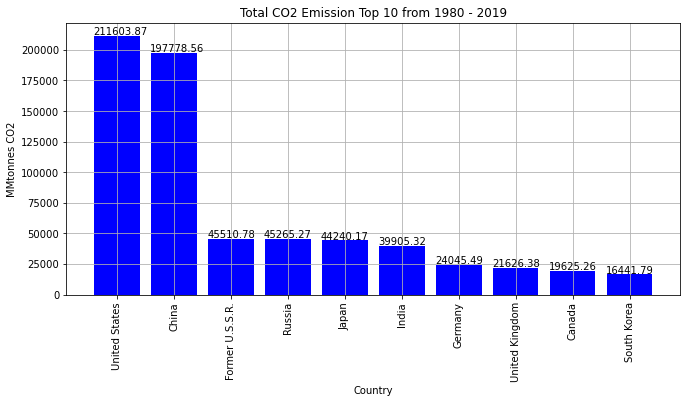

In [109]:
f, axes = plt.subplots(1,1, figsize = (11, 5))

plt.bar(co2_top10.Country,co2_top10.CO2_emission,align='center', linewidth=2, color='blue')

for i, v in enumerate(co2_top10.CO2_emission.round(decimals = 2)):
    plt.text(i-.42, v + 1000, str(v))

plt.title('Total CO2 Emission Top 10 from 1980 - 2019')
plt.ylabel('MMtonnes CO2')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.grid(True)

plt.show()